In [273]:
import numpy as np
import pandas as pd
total=pd.read_csv("./data_with_prediction.csv")
import sklearn as sk
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
import matplotlib.pyplot as plt

In [274]:
from sklearn import preprocessing
le_state = preprocessing.LabelEncoder()

In [275]:
1+1

2

In [276]:
#transforming state into categorical
le_state.fit(total["OKRUG"])

LabelEncoder()

In [277]:
total["OKRUG"] = le_state.transform(total["OKRUG"])

In [278]:
total["OKRUG"].value_counts()

5     7610
6     4593
8     4214
1     3514
4     3041
7     3018
10    2948
2     2904
3     2593
0     1934
11    1088
9      669
Name: OKRUG, dtype: int64

In [279]:
#transforming material variable 
le_material = preprocessing.LabelEncoder()
le_material.fit(total["material"])
total["material"] = le_material.transform(total["material"])

In [264]:
total["material"].value_counts()

0    29007
1     3947
4     2048
3     1963
5     1159
2        2
Name: material, dtype: int64

In [65]:
#transforming sub_area
le_subarea = preprocessing.LabelEncoder()
le_subarea.fit(total["sub_area"])
total["sub_area"] = le_subarea.transform(total["sub_area"])

ValueError: labels ['life_sq'] not contained in axis

In [280]:
total1=total.select_dtypes(include=['float64'])
total1['OKRUG']=total['OKRUG']
total1['train_or_test']=total["train_or_test"]
total1['id']=total["id"]
total1.drop(['life_sq'], axis=1,inplace=True)

/Users/mac/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mac/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/mac/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [6]:
total1=total[['id','price_doc',
                'full_sq',
                'life_sq',
                'num_room',
                'sport_count_5000',
                'trc_count_5000',
                'zd_vokzaly_avto_km',
                'sadovoe_km',
                'kremlin_km',
                'bulvar_ring_km',
                'ttk_km',
                'office_sqm_5000',
                'nuclear_reactor_km',
                'sport_objects_raion',
                'cafe_count_5000_price_1000',
                'stadium_km',
                'kitch_sq',
                'university_km',
                'theater_km',
                'swim_pool_km',
                'catering_km',
                'thermal_power_plant_km',
                'workplaces_km',
                'market_count_5000',
                'school_education_centers_raion',
                'big_church_km',
                'metro_min_avto',
                'healthcare_centers_raion',
                'shopping_centers_km',
                'mosque_count_5000',
                'public_healthcare_km',
                'ekder_all',
                'area_m',
                'university_top_20_raion',
                'leisure_count_500',
                'big_road2_km',
                'bus_terminal_avto_km',
                'ratio_brick',
                'green_part_5000',
                'ice_rink_km',
                'raion_popul',
                'hospice_morgue_km',
                'additional_education_km',
                'school_km',
                'ratio_1920',
                'railroad_station_avto_min','sub_area','train_or_test']]

In [281]:
a = pd.get_dummies(total1.OKRUG)
L = range(0, len(a.columns))
a.columns = ["OKRUG_"+str(x) for x in L]
total1 = pd.concat([total1,a], axis=1)

In [7]:
b = pd.get_dummies(total1.sub_area)
L = range(0, len(b.columns))
b.columns = ["sub_area_"+str(x) for x in L]
total1 = pd.concat([total1,b],axis=1)

In [270]:
c = pd.get_dummies(total1.material)
L = range(0, len(c.columns))
c.columns = ["material_"+str(x) for x in L]
total1 = pd.concat([total1,c],axis=1)

In [91]:
x= total1.drop('price_doc', axis=1)
x.columns.values

array(['id', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq',
       'area_m', 'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'preschool_education_centers_raion',
       'children_school', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'healthcare_centers_raion',
       'university_top_20_raion', 'sport_objects_raion',
       'additional_education_raion', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion', 'full_all', 'male_f',
       'female_f', 'young_all', 'young_male', 'young_female', 'work_all',
       'work_male', 'work_female', 'ekder_all', 'ekder_male',
       'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all',
       '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female',
       '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male',
       '0_13_female', 'ID_metro', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk'

In [289]:
total1.drop(["OKRUG"],inplace= True,axis=1)

In [290]:
test = total1[total1["train_or_test"]=="test"]
train = total1[total1["train_or_test"]=="train"]

In [291]:
test = test.drop(["id","train_or_test","price_doc"], axis= 1)

In [292]:
train = train.drop(["id","train_or_test"], axis=1)

In [293]:
train["log_price"] = train["price_doc"].apply(np.log)

In [294]:
train = train.drop(["price_doc"], axis=1)

In [295]:
train.columns.values

array(['full_sq', 'floor', 'num_room', 'kitch_sq', 'area_m',
       'green_zone_part', 'indust_part', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
       'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'railroad_station_avto_km',
       'railroad_station_avto_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'water_km', 'mkad_km',
       'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km',
       'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km',
       'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km',
       'thermal_power_plant_km', 'ts_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km',
       'stadium_km', 'basketball_km', 'hospice_morgue_

In [296]:
train.shape

(30464, 119)

In [297]:
test.shape

(7662, 118)

In [298]:
train.shape

(30464, 119)

In [299]:
train.columns.values

array(['full_sq', 'floor', 'num_room', 'kitch_sq', 'area_m',
       'green_zone_part', 'indust_part', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
       'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'railroad_station_avto_km',
       'railroad_station_avto_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'water_km', 'mkad_km',
       'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km',
       'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km',
       'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km',
       'thermal_power_plant_km', 'ts_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km',
       'stadium_km', 'basketball_km', 'hospice_morgue_

In [305]:
total_data = train.iloc[:,0:118]
total_target = train["log_price"]

In [319]:
x = pd.isnull(data_test)
x.apply(sum)

full_sq                              0
floor                                0
num_room                             0
kitch_sq                             0
area_m                               0
green_zone_part                      0
indust_part                          0
metro_min_avto                       0
metro_km_avto                        0
metro_min_walk                       0
metro_km_walk                        0
kindergarten_km                      0
school_km                            0
park_km                              0
green_zone_km                        0
industrial_km                        0
water_treatment_km                   0
cemetery_km                          0
incineration_km                      0
railroad_station_walk_km             0
railroad_station_walk_min            0
railroad_station_avto_km             0
railroad_station_avto_min            0
public_transport_station_km          0
public_transport_station_min_walk    0
water_km                 

In [302]:
from sklearn.cross_validation import train_test_split
data_train, data_test, target_train, target_test = train_test_split(total_data, total_target, test_size=0.3 )
randomForest.fit(data_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [309]:
randomForest.score(data_train, target_train)

0.99997036215661739

In [304]:
randomForest1 = ensemble.RandomForestRegressor(max_depth = 10,oob_score=True)

In [228]:
randomForest1.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [306]:
max_featutres = range(8,11,1)
n_estimators = range(200,601,100)
grid_para_forest = {
    'max_features': max_featutres,
    "n_estimators": n_estimators
}

In [307]:
from sklearn.model_selection import GridSearchCV
para_search = GridSearchCV(estimator = randomForest1, 
                           param_grid = grid_para_forest, cv=10).fit(total_data, total_target)

In [28]:
print(list(para_search.cv_results_.keys()))

['rank_test_score', 'split6_test_score', 'split7_train_score', 'split0_train_score', 'split2_test_score', 'mean_fit_time', 'split3_train_score', 'split6_train_score', 'split9_test_score', 'std_test_score', 'params', 'split8_test_score', 'std_score_time', 'std_fit_time', 'std_train_score', 'split4_test_score', 'split1_train_score', 'split2_train_score', 'split4_train_score', 'mean_score_time', 'split9_train_score', 'split5_test_score', 'mean_train_score', 'split8_train_score', 'split7_test_score', 'split0_test_score', 'mean_test_score', 'param_max_features', 'split3_test_score', 'split5_train_score', 'split1_test_score']


In [253]:
para_search.param_grid

{'max_features': [8, 9, 10], 'n_estimators': [200, 300, 400, 500, 600]}

/Users/mac/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


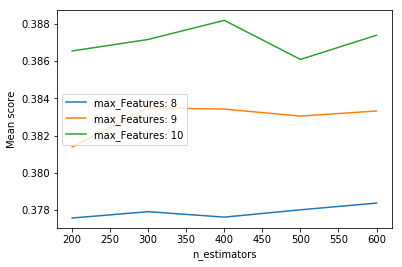

In [310]:
scores = [x[1] for x in para_search.grid_scores_]
scores = np.array(scores).reshape(len(max_featutres), len(n_estimators))

for ind, i in enumerate(max_featutres):
    plt.plot(n_estimators, scores[ind], label='max_Features: ' + str(i))

plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean score')
plt.show()

In [314]:
rf = para_search.best_estimator_

In [316]:
rf.fit(total_data, total_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [317]:
rf.score(total_data, total_target)

0.52672529044072613

In [ ]:
total_data

In [318]:
y_hat = rf.predict(test)  

In [328]:
rf.score(data_test,target_test)

ValueError: Number of features of the model must match the input. Model n_features is 118 and input n_features is 119 

In [356]:
test_hat = rf.predict(test)
test_hat.shape

(7662,)

In [355]:
train_hat = rf.predict(total_data)
train_hat.shape

(30464,)

,Stack
0,15.394187
1,15.476615
2,15.406672
3,16.059783
4,16.220677
5,15.692060
6,15.558058
7,15.354468
8,15.380354
9,15.208725


array([ array([ 15.48121979,  15.90811748,  15.50191625, ...,  15.36063357,
        15.49575688,  15.91804171]),
       array([ 15.3941871 ,  15.47661537,  15.40667185, ...,  15.54706224,
        15.96556327,  15.52362896])], dtype=object)

In [321]:
test_id = total1[total1["train_or_test"]=="test"][["id"]]

In [322]:
test_id = test_id.reset_index().drop("index",axis=1)

In [323]:
test_hat = pd.DataFrame(test_hat)

In [324]:
test_hat = test_hat.apply(np.exp)

In [325]:
test_hat.columns = ["price_doc"]

In [326]:
final = pd.concat([test_id,test_hat],axis=1)

In [327]:
final.to_csv("submission_stack_rf.csv",index=False)

In [23]:
x_train = np.array(total_data)
y_train = np.ravel(total_target)
x_train = np.array(train.iloc[:, 0:57])
y_train = np.ravel(train.iloc[:, -1])

In [329]:
test.columns.values

array(['full_sq', 'floor', 'num_room', 'kitch_sq', 'area_m',
       'green_zone_part', 'indust_part', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
       'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km',
       'cemetery_km', 'incineration_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'railroad_station_avto_km',
       'railroad_station_avto_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'water_km', 'mkad_km',
       'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km',
       'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km',
       'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km',
       'thermal_power_plant_km', 'ts_km', 'big_market_km',
       'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km',
       'stadium_km', 'basketball_km', 'hospice_morgue_

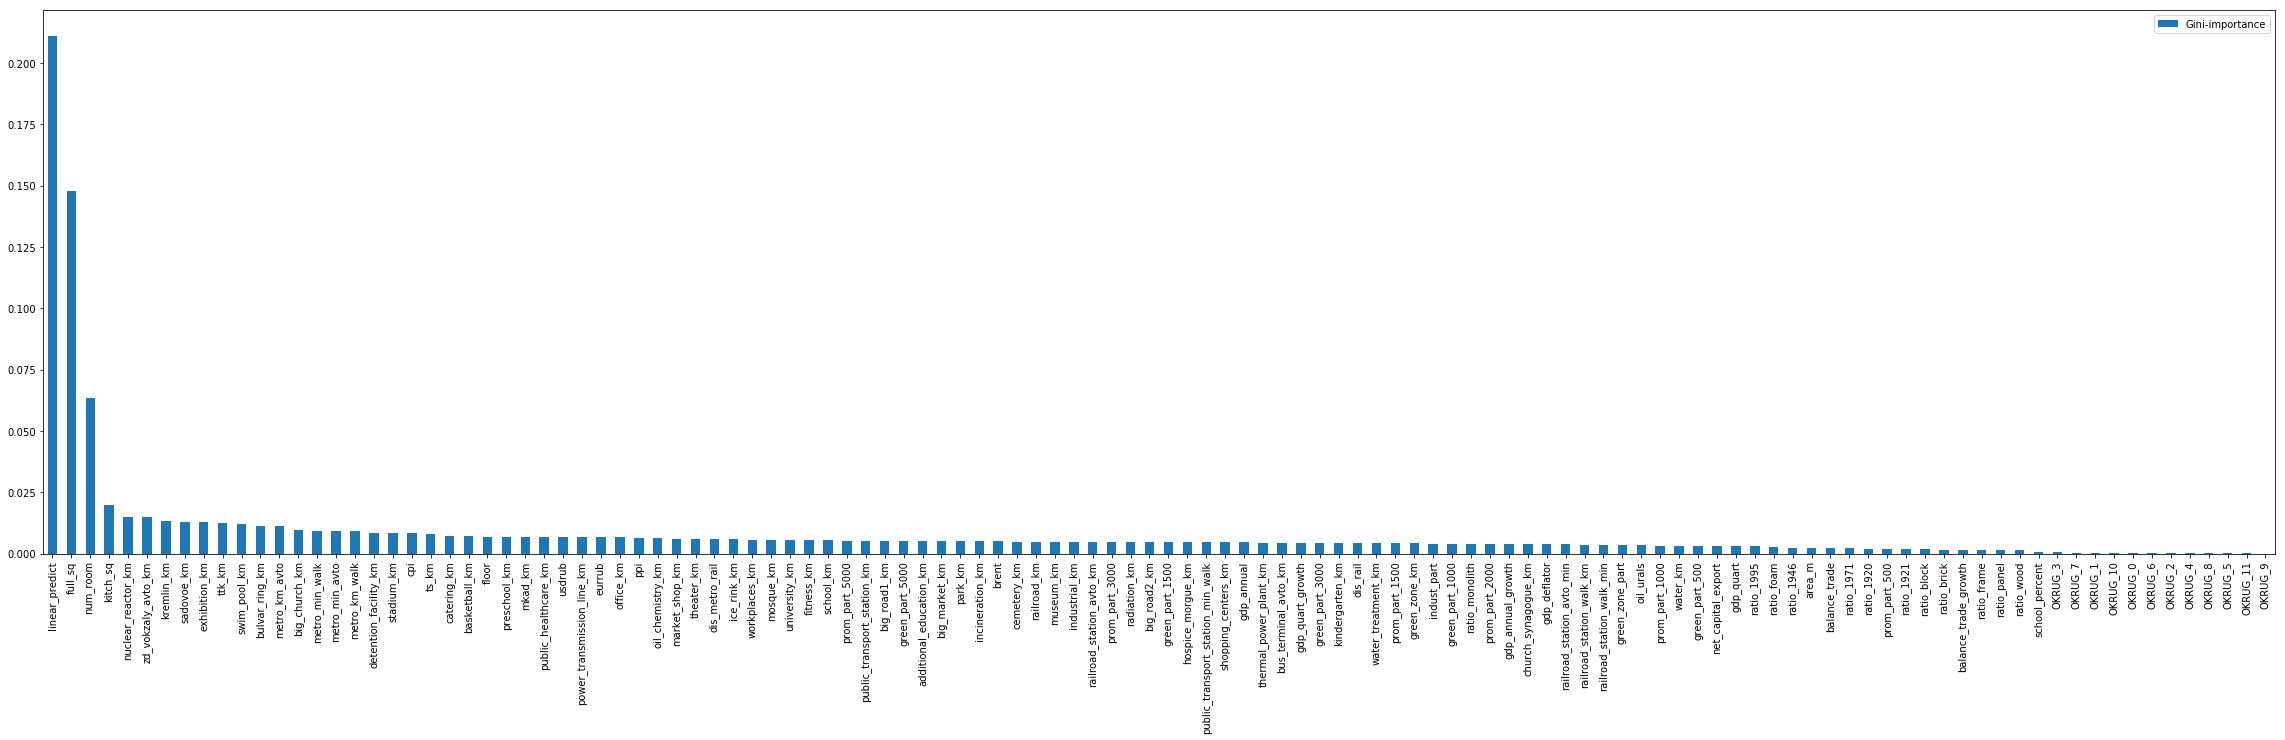

In [336]:
%matplotlib inline
from matplotlib import pyplot as plt
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(test.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',ascending=False).plot(kind='bar',figsize=(40,10))
plt.savefig('Stacking_Gini_importance')

In [331]:
para_search.best_estimator_.feature_importances_

array([  1.47796663e-01,   6.87379593e-03,   6.35395669e-02,
         1.96500735e-02,   2.31862858e-03,   3.47280339e-03,
         4.07816739e-03,   9.23473749e-03,   1.11314434e-02,
         9.38730217e-03,   9.01356093e-03,   4.29001635e-03,
         5.33789048e-03,   5.04338320e-03,   4.09871780e-03,
         4.83443814e-03,   4.21546838e-03,   4.90152599e-03,
         5.00331812e-03,   3.65631073e-03,   3.60505384e-03,
         4.82488517e-03,   3.71561775e-03,   5.18571462e-03,
         4.63239599e-03,   3.23655645e-03,   6.83576903e-03,
         1.26102611e-02,   1.29049083e-02,   1.11368031e-02,
         1.31422025e-02,   5.16278254e-03,   4.74175360e-03,
         4.87143715e-03,   1.47286748e-02,   4.46150624e-03,
         6.20891489e-03,   1.50337592e-02,   4.74440266e-03,
         6.78868325e-03,   4.49401226e-03,   7.97244097e-03,
         5.07081082e-03,   5.98227375e-03,   5.35349362e-03,
         1.20580609e-02,   5.75819965e-03,   8.39838579e-03,
         7.18480548e-03,

In [382]:
x=pd.DataFrame({'Stack':train_hat})
y=pd.DataFrame({'Stack':test_hat})
a=pd.concat([x,y],axis=0)
a = a.reset_index(drop=True)
Final=pd.concat([total,a],axis=1)


In [383]:
Final.to_csv('Final.csv')

In [384]:
Final.columns.values

array(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'num_room',
       'kitch_sq', 'product_type', 'sub_area', 'area_m', 'raion_popul',
       'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_education_centers_raion', 'children_school',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'healthcare_centers_raion',
       'university_top_20_raion', 'sport_objects_raion',
       'additional_education_raion', 'culture_objects_top_25',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion',
       'detention_facility_raion', 'full_all', 'male_f', 'female_f',
       'young_all', 'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all',
       '0